In [1]:
import pandas as p
import matplotlib.pyplot as plt

In [2]:
advertisers = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\advertisers.csv")
locations = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\locations.csv")
results = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\results.csv")

In [3]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [4]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [5]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [6]:
results['State']= results['State'].str.strip().str.lower()
locations['Location name'] = locations['Location name'].str.strip().str.lower()
merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


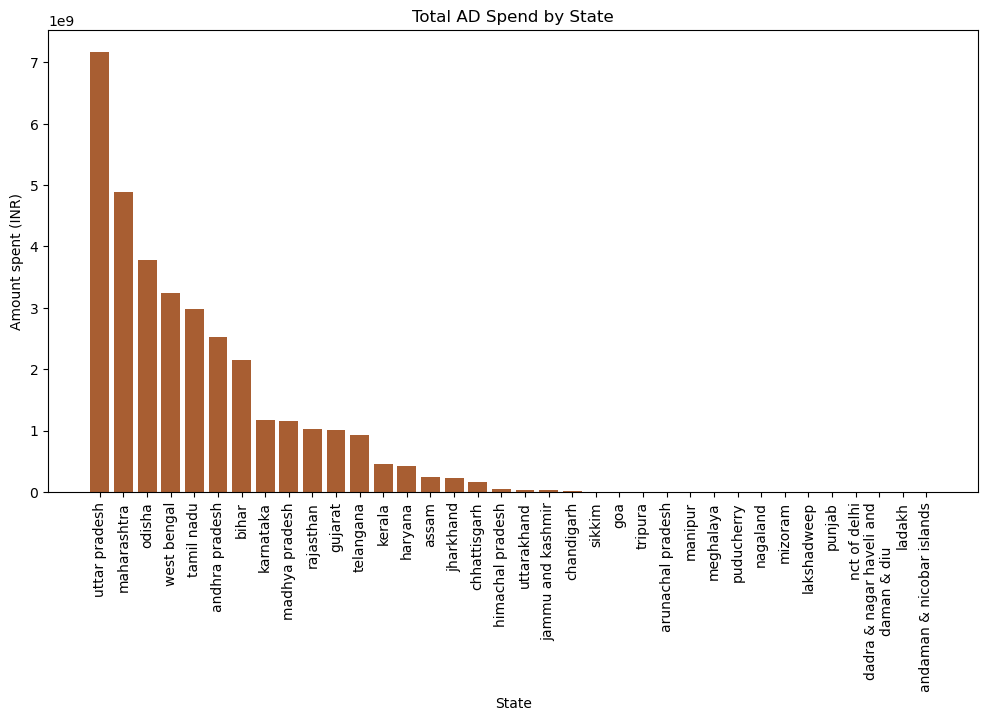

In [7]:
#AmountspendStatewise
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(state_ad_spend.index, state_ad_spend.values,color='#a85e32')
plt.title('Total AD Spend by State')
plt.xlabel('State')
plt.ylabel('Amount spent (INR)')
plt.xticks(rotation=90)
plt.show()


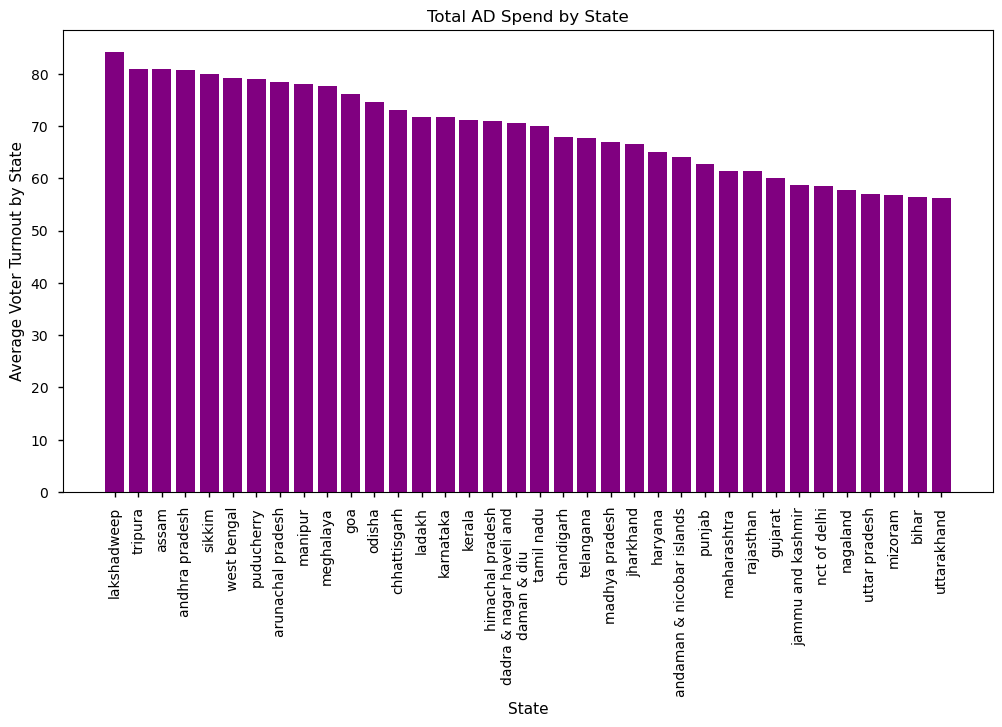

In [8]:
#Voter Turnout
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().sort_values(ascending=False)
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(12, 6))
plt.bar(state_voter_turnout.index, state_voter_turnout.values,color='purple')
plt.title('Total AD Spend by State')
plt.xlabel('State')
plt.ylabel('Average Voter Turnout by State')
plt.xticks(rotation=90)
plt.show()

In [9]:
advertisers['Amount spent (INR)'] = p.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')
advertisers

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342.0,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100.0,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399.0,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327.0,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499.0,879
...,...,...,...,...,...
20827,104633268709556,If You Don't Bark,These ads ran without a disclaimer,NaN,2
20828,118271861357765,Story time,These ads ran without a disclaimer,NaN,1
20829,218017134738366,know_sacred_wisdom,These ads ran without a disclaimer,NaN,1
20830,270489126793,Energy Globe Award,These ads ran without a disclaimer,NaN,1


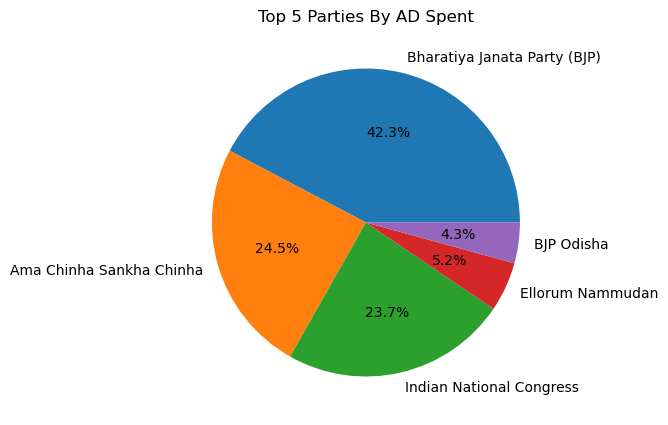

In [10]:
advertisers['Amount spent (INR)'] = p.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')
advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)
party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

top_5_parties = party_ad_spend.head(5).reset_index()
plt.figure(figsize=(15,5))
plt.title('Top 5 Parties By AD Spent')
plt.pie(top_5_parties['Amount spent (INR)'],labels=top_5_parties['Page name'],autopct='%1.1f%%')
plt.show()

In [11]:
constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)
constituency_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,NaN,west bengal,77244996.0
546,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,west bengal,77244996.0
547,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,NaN,west bengal,77244996.0
548,549,57.0,west bengal,Mathurapur,1817068,82.02,1490299,NaN,west bengal,77244996.0


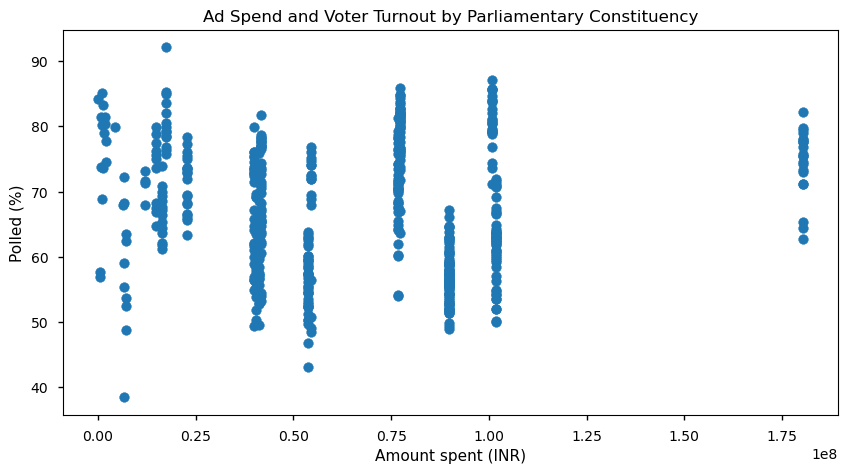

In [12]:
plt.figure(figsize=(10,5))
plt.xlabel('Amount spent (INR)')
plt.ylabel('Polled (%)')
plt.title('Ad Spend and Voter Turnout by Parliamentary Constituency')
plt.scatter(x=constituency_data['Amount spent (INR)'],y=constituency_data['Polled (%)'])
plt.show()

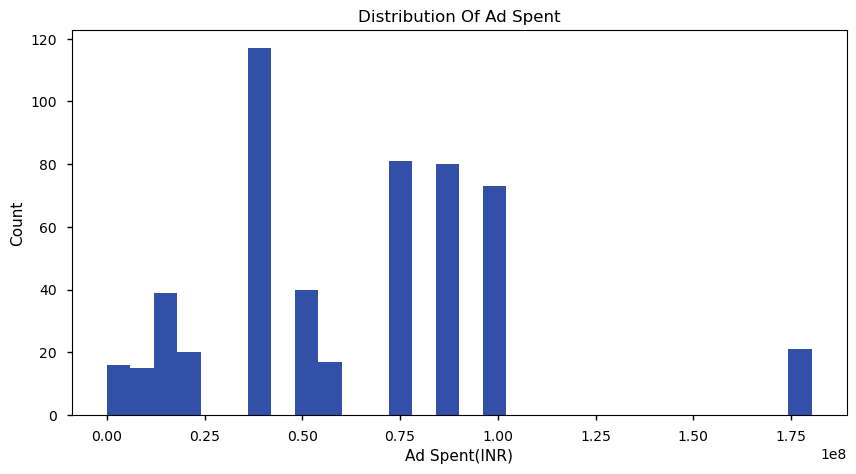

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel('Ad Spent(INR)')
plt.ylabel('Count')
plt.title('Distribution Of Ad Spent')
plt.hist(merged_data['Amount spent (INR)'],bins=30,color='#3250a8')
plt.show()

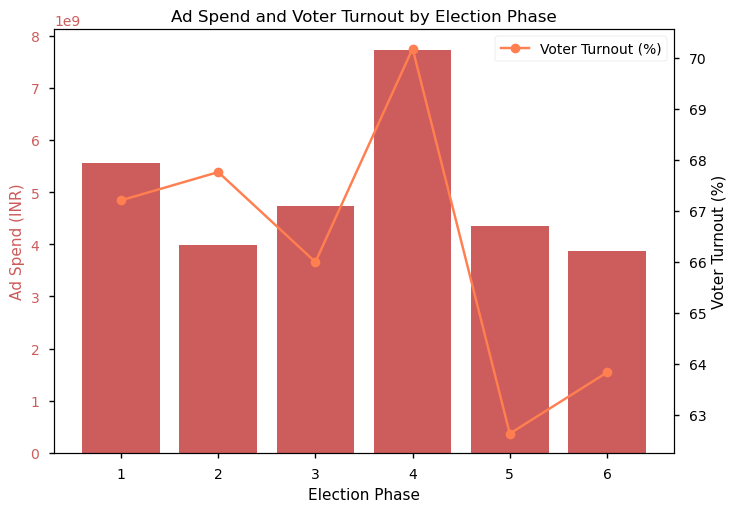

In [14]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()
fig, ax1 = plt.subplots()

# Plot Ad Spend on the primary y-axis
ax1.bar(phase_analysis["Phase"], phase_analysis["Amount spent (INR)"], color='indianred', label="Ad Spend (INR)")
ax1.set_xlabel("Election Phase")
ax1.set_ylabel("Ad Spend (INR)", color='indianred')
ax1.tick_params(axis='y', labelcolor='indianred')

# Create a secondary y-axis for Voter Turnout
ax2 = ax1.twinx()
ax2.plot(phase_analysis["Phase"], phase_analysis["Polled (%)"], color='coral', label="Voter Turnout (%)", marker='o')
ax2.set_ylabel("Voter Turnout (%)",)
ax2.tick_params(axis='y')

# Set the title and legend
plt.title("Ad Spend and Voter Turnout by Election Phase")
plt.legend()

# Show the plot
plt.show()

In [17]:
#Analysing results candidate wise
candidateResults = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\election_results_candidates_2024.csv")
candidateResults.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


In [18]:
candidateResults.tail(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,Result Declared
534,Vijayawada,12,KESINENI SIVANATH (CHINNI),Telugu Desam,KESINENI SRINIVAS (NANI),Yuvajana Sramika Rythu Congress Party,282085,Result Declared
535,Visakhapatnam,4,SRIBHARAT MATHUKUMILI,Telugu Desam,JHANSI LAKSHMI. BOTCHA.,Yuvajana Sramika Rythu Congress Party,504247,Result Declared
536,Vizianagaram,3,APPALANAIDU KALISETTI,Telugu Desam,BELLANA CHANDRASEKHAR,Yuvajana Sramika Rythu Congress Party,249351,Result Declared
537,Warangal,15,KADIYAM KAVYA,Indian National Congress,AROORI RAMESH,Bharatiya Janata Party,220339,Result Declared
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared
542,Zahirabad,5,SURESH KUMAR SHETKAR,Indian National Congress,B. B. PATIL,Bharatiya Janata Party,46188,Result Declared


In [20]:
candidateResults.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


In [22]:
candidateResults.value_counts().reset_index()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,count
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared,1
1,Mumbai North East,28,SANJAY DINA PATIL,Shiv Sena (Uddhav Balasaheb Thackrey),MIHIR CHANDRAKANT KOTECHA,Bharatiya Janata Party,29861,Result Declared,1
2,Nagaland,1,S SUPONGMEREN JAMIR,Indian National Congress,DR CHUMBEN MURRY,Nationalist Democratic Progressive Party,50984,Result Declared,1
3,Nabarangpur,12,BALABHADRA MAJHI,Bharatiya Janata Party,PRADEEP KUMAR MAJHI,Biju Janata Dal,87536,Result Declared,1
4,NILGIRIS,19,RAJA A,Dravida Munnetra Kazhagam,DR MURUGAN L,Bharatiya Janata Party,240585,Result Declared,1
...,...,...,...,...,...,...,...,...,...
537,Farrukhabad,40,MUKESH RAJPUT,Bharatiya Janata Party,DR. NAVAL KISHOR SHAKYA,Samajwadi Party,2678,Result Declared,1
538,Faridkot,9,SARABJEET SINGH KHALSA,Independent,KARAMJIT SINGH ANMOL,Aam Aadmi Party,70053,Result Declared,1
539,Faizabad,54,AWADHESH PRASAD,Samajwadi Party,LALLU SINGH,Bharatiya Janata Party,54567,Result Declared,1
540,FARIDABAD,10,KRISHAN PAL,Bharatiya Janata Party,MAHENDER PRATAP SINGH,Indian National Congress,172914,Result Declared,1


In [28]:
candidateResults.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [43]:
candidateResults[(candidateResults['Trailing Candidate'].isnull()) & (candidateResults['Trailing Party'].isnull())]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [45]:
candidateResults.dropna(inplace=True)
candidateResults.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

In [46]:
candidateResults.dtypes

Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                object
Status                object
dtype: object

In [53]:
candidateResults.Margin = candidateResults.Margin.astype('int64')
candidateResults.dtypes

Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                 int64
Status                object
dtype: object

In [59]:
candidateResults.loc[candidateResults.Margin.idxmax()]

,index,221
0,Constituency,INDORE
1,Const. No.,26
2,Leading Candidate,SHANKAR LALWANI
3,Leading Party,Bharatiya Janata Party
4,Trailing Candidate,SANJAY S/O LAKSHMAN SOLANKI
5,Trailing Party,Bahujan Samaj Party
6,Margin,1175092
7,Status,Result Declared


In [60]:
candidateResults.loc[candidateResults.Margin.idxmin()]

Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                   48
Status                                      Result Declared
Name: 357, dtype: object

In [64]:
seatsWon = candidateResults['Leading Party'].value_counts()
seatsWon

Leading Party
Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League

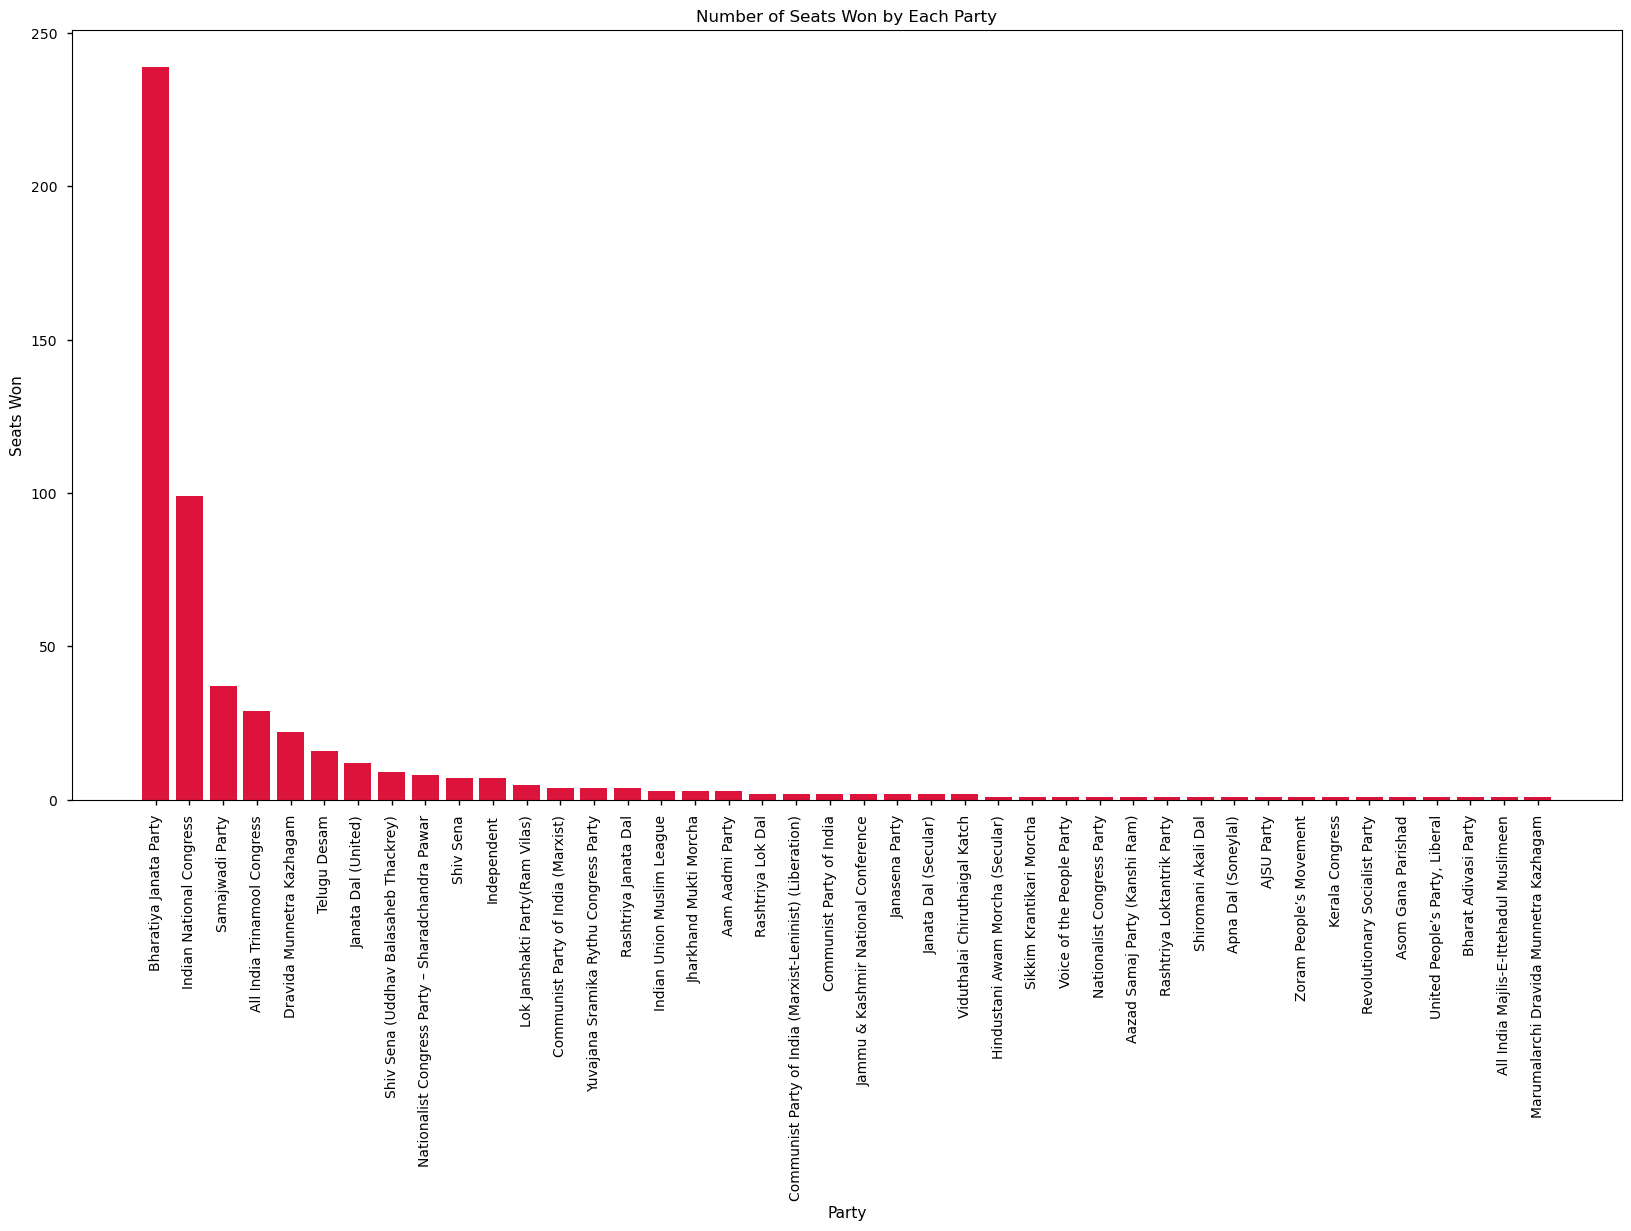

In [76]:
plt.figure(figsize=(20,10))
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.bar(seatsWon.index,seatsWon.values,color='crimson')
plt.show()

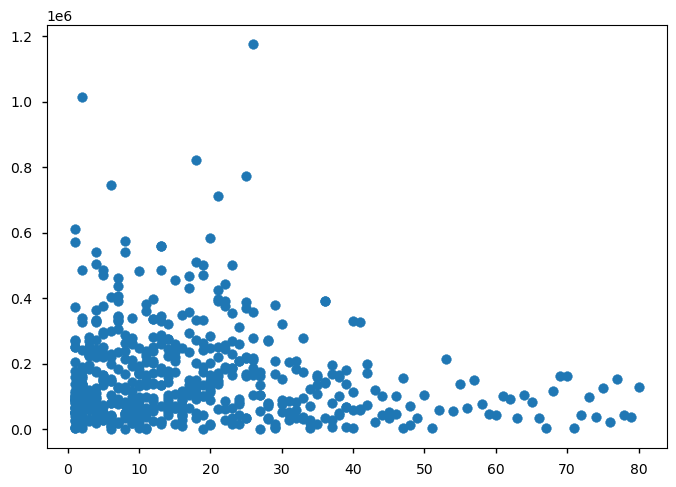

In [79]:
correlation = candidateResults[['Const. No.','Margin']].corr()
plt.scatter(candidateResults['Const. No.'],candidateResults['Margin'])
